In [1]:
import numpy as np

In [2]:
A = np.array([[1,2,3],
              [4,5,6]])

In [4]:
A.shape

(2, 3)

In [5]:
x = np.array([2,4,6])

In [7]:
x.shape

(3,)

In [8]:
A**2

array([[ 1,  4,  9],
       [16, 25, 36]])

In [9]:
A + 1

array([[2, 3, 4],
       [5, 6, 7]])

In [10]:
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [11]:
A + x

array([[ 3,  6,  9],
       [ 6,  9, 12]])

In [12]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
x

array([2, 4, 6])

In [14]:
y = np.array([1,2,33,4])

In [15]:
y.shape

(4,)

In [17]:
# A + y

In [18]:
np.cos(A)

array([[ 0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029]])

In [19]:
np.zeros(shape=(3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [20]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
E = np.eye(4)

In [26]:
from numpy import linalg as LA

In [27]:
LA.eig(E)

(array([1., 1., 1., 1.]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

Zadatak 1

Odrediti koeficijente w0 i w1 tako da funkcija 𝑓(𝑥)=w0+w1𝑥 u smislu metode najmanjih kvadrata najbolje aproksimira skup tačaka (0,1.2), (0.5,2.05), (1,2.9) i (−0.5,0.1) u ravni.

In [31]:
x = np.array([0,0.5,1,-0.5])
y = np.array([1.2,2.05,2.9,0.1])

In [34]:
ones = np.ones(x.shape)
ones

array([1., 1., 1., 1.])

In [37]:
A = np.vstack((ones, x)).T
A

array([[ 1. ,  0. ],
       [ 1. ,  0.5],
       [ 1. ,  1. ],
       [ 1. , -0.5]])

In [40]:
solution, rss, _, _ = LA.lstsq(A, y, rcond=None)

In [41]:
w0, w1 = solution

In [42]:
w0

1.100000000000001

In [43]:
w1

1.8500000000000005

In [44]:
# 1.1 + 1.85x

Zadatak 2

Odrediti vrednosti koeficijenata 𝑎 i 𝑏 tako da funkcija 𝑓(𝑥)=𝑎+𝑏sin𝑥 u smislu metode najmanjih kvadrata aproksimira skup tacaka (2,2.6), (−1.22,−1.7), (8.32,2.5) i (4.23,−1.6) u ravni. Dati ocenu greske. Prikazati skup tačaka i nacrtati rezultujucu funkciju.

In [46]:
x = np.array([2,-1.22,8.32,4.23])
y = np.array([2.6,-1.7,2.5,-1.6])

ones = np.ones(x.shape)
A = np.vstack((ones, np.sin(x))).T
A

array([[ 1.        ,  0.90929743],
       [ 1.        , -0.93909936],
       [ 1.        ,  0.89336444],
       [ 1.        , -0.88588921]])

In [49]:
solution, rss, _, _ = LA.lstsq(A, y, rcond=None)

In [50]:
a, b = solution
a, b

(0.4629244420449795, 2.315513480740615)

In [48]:
from matplotlib import pyplot as plt

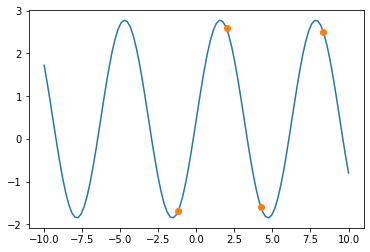

In [54]:
xs = np.linspace(-10, 10, 100)
ys = a + b * np.sin(xs)

plt.plot(xs, ys)
plt.plot(x, y, 'o')

Zadatak 3

U datoteci social_reach.csv se nalaze cene reklamiranja za različite demografske grupe, koje su date u hiljadama evra za 1000 pregleda. Svaka od tri kolone označava različitu platformu za reklamiranje (na primer, platforme mogu biti Facebook, Instagram ili YouTube). Svaki red označava različitu demografsku grupu, koja može npr. biti posebna država u kojoj se reklama plasira. Potrebno je odrediti iznos sredstava da se ostvari približno milion pregleda za svaku demografsku grupu, gledajući po svim platformama ukupno.

In [55]:
import pandas as pd

In [56]:
df = pd.read_csv('social_reach.csv')
df

,web1,web2,web3
0,0.97,1.86,0.41
1,1.23,2.18,0.53
2,0.80,1.24,0.62
3,1.29,0.98,0.51
4,1.10,1.23,0.69
5,0.67,0.34,0.54
6,0.87,0.26,0.62
7,1.10,0.16,0.48
8,1.92,0.22,0.71
9,1.29,0.12,0.62


In [57]:
A = df

In [58]:
b = np.ones(df.shape[0]) * 1000
b

array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000.])

In [59]:
LA.lstsq(A, b, rcond=None)

(array([  62.07662454,   99.98500403, 1442.83746254]),
 array([175928.89516314]),
 3,
 array([5.03459707, 2.01466955, 0.43259558]))

Zadatak 4

Svaki red u fajlu advertising.csv sadrži informacije o cenama u hiljadama dolara reklamnih usluga na određenom tržištu. Prva kolona se odnosi na cene reklamiranja na televiziji, druga na radiju, a treća u novinama. Četvrta kolona se odnosi na ukupnu prodaju proizvoda koji su se reklamirali na datim medijima. Kreirati linearni model koji predviđa prodaju na osnovu cena reklamiranja.

In [60]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [61]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

In [67]:
X = df.drop('Sales', axis=1)
X.shape

(200, 3)

In [73]:
y = df['Sales']
y.shape

(200,)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [77]:
X_train.shape

(160, 3)

In [78]:
y_train.shape

(160,)

In [79]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
model.coef_

array([ 0.04641781,  0.18361903, -0.00259594])

In [81]:
model.intercept_

3.0068937879706326

In [83]:
# 2.9 + 0.04 * TV + 0.18 * Ra - 0.001 * Np

In [84]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [86]:
mean_squared_error(y_test, y_pred)

1.4918310268870536

In [88]:
mean_absolute_error(y_test, y_pred)

0.9802133079593297

In [89]:
r2_score(y_test, y_pred)

0.937032271634503